# Green Canopy Cover

In this tutorial we will learn how to quantify the percent of green canopy cover from downward-facing digital images taked with a point-and-shoot camera or mobile device.

The classification technique exploits the Red, Green, and Blue (RGB) bands of the image. Each band consists of a 2D matrix of *m* rows by *n* columns.


In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


The list of file names can be used together with a function to iterate and analyze each image in the folder.

## Read and process a single image


In [2]:
# Read example image
rgb = mpimg.imread('../datasets/canopy_cover/grassland.jpg')


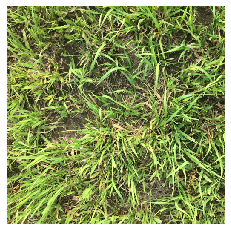

In [3]:
# Display image
plt.imshow(rgb)
plt.axis('off')
plt.show()


In [4]:
# Inspect shape
print(rgb.shape)
print(rgb.dtype)


(512, 512, 3)
uint8


Images are often represented as unsigned integers of 8 bits. This means that each pixel in each band can only hold one of 256 integer values. Because the range is zero-index, the pixel values can range from 0 to 255. The color of a pixel is repreented by triplet, for example the triplet (0,0,0) represents black, while (255,255,255) represents white. Similarly, the triplet (255,0,0) represents red and (255,220,75) represents a shade of yellow.


In [5]:
# Extract data in separate variable for easier manipulation.
red = rgb[:, :, 0] #Extract matrix of red pixel values (m by n matrix)
green = rgb[:, :, 1] #Extract matrix of green pixel values
blue = rgb[:, :, 2] #Extract matrix of blue pixel values


In [6]:
# Compare shape with original image
print(red.shape)


(512, 512)


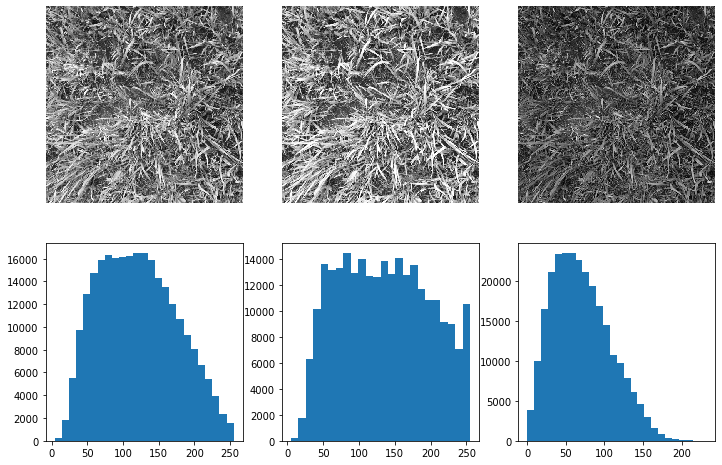

In [7]:
# Show information in single bands
plt.figure(figsize=(12,8))

plt.subplot(2,3,1)
plt.imshow(red, cmap="gray")
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(green, cmap="gray")
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(blue, cmap="gray")
plt.axis('off')

# Add histograms using Doane's rule for histogram bins
plt.subplot(2,3,4)
plt.hist(red.flatten(), bins='doane')

plt.subplot(2,3,5)
plt.hist(green.flatten(), bins='doane')

plt.subplot(2,3,6)
plt.hist(blue.flatten(), bins='doane')
plt.show()


Find out more about all the different methods for generating hsitogram bins [here](https://www.wikiwand.com/en/Histogram)

In [8]:
# Calculate red to green ratio for each pixel. The result is an m x n array.
red_green_ratio = red/green

# Calculate blue to green ratio for each pixel. The result is an m x n array.
blue_green_ratio = blue/green

# Excess green
ExG = 2*green - red - blue


In [11]:
# Let's check the resulting data type of the previous computation
print(red_green_ratio.shape)
print(blue_green_ratio.dtype)


(512, 512)
float64


The size of the array remains unchanged, but Python automatically changes the data type from *uint8* to *float64*. This is great because we need to make use of a continuous numerical scale to classify our green pixels. By generating the color ratios our scale also changes. Let's look a this using a histogram.


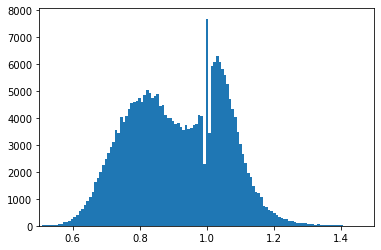

In [12]:
# Plot histogram
plt.figure()
plt.hist(red_green_ratio.flatten(), bins='scott')
plt.xlim(0.5,1.5)
plt.show()


In [14]:
# Classification of green pixels
bw = np.logical_and(red_green_ratio<0.95, blue_green_ratio<0.95, ExG>20) 


In [15]:
print(bw.shape)
print(bw.dtype)
print(bw.size)

(512, 512)
bool
262144


See that we started with an m x n x 3 (original image) and we finished with and m x n x 2 (binary or classified image)

In [16]:
# Compute percent green canopy cover
canopy_cover = np.sum(bw) / np.size(bw) * 100 
print('Green canopy cover:',round(canopy_cover,2),' %')


Green canopy cover: 56.64  %


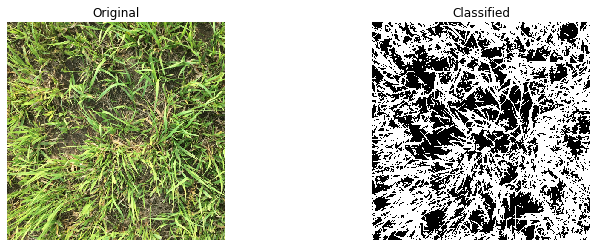

In [20]:
plt.figure(figsize=(12,4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(rgb)
plt.title('Original')
plt.axis('off')

# CLassified image
plt.subplot(1, 2, 2)
plt.imshow(bw, cmap='gray')
plt.title('Classified')
plt.axis('off')

plt.show()


Classified pixels are displayed in white. The classification for this image is exceptional due to the high contrast between the plant and the background. There are also small regions where our appraoch misclassified grren canopy cover as a consequence of bright spots on the leaves. For many applications this error is small and can be ignored, but this issue highlights the importance of taking high quality pictures in the field. An effective image analysis starts with a high quality image.

## References

Patrignani, A. and Ochsner, T.E., 2015. Canopeo: A powerful new tool for measuring fractional green canopy cover. Agronomy Journal, 107(6), pp.2312-2320.